<a href="https://colab.research.google.com/github/Restufed/pmogramn-terstruktur/blob/main/DETEKSI_kinerja_siswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Description¶ In this practical exercise, we will work on predicting student performance using the Student Performance dataset. The dataset contains information about students'demographics, family background, and academic performance. Your task is to build an MLP model using PyTorch to predict students' performance accurately. Dataset Description The Student Performance dataset contains the following columns: ●school ● sex ● age ● address ● famsize ● Pstatus¶ ● Medu ● Fedu ● Mjob ● Fjob ● reason ● guardian ● traveltime¶ ● studytime ● failures ● schoolsup ● famsup ● paid ● activities nursery¶ ● higher ● internet ● romantic ● famrel¶ ● freetime ● goout ● Dalc¶ ● Walc ● health ● absences ● G1 (First period grade)¶ ● G2 (Second period grade ● G3 (Final grade)¶




In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!ls "/content/drive/MyDrive/kaggle"

'DETEKSI-kinerja siswa'  ' deteksi kinerja siswa.ipynb'   student_data.csv


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets
from torchvision import transforms
from copy import deepcopy
import torch.optim as optim
from tqdm.notebook import tqdm

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/kaggle/student_data.csv")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [10]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
data['address'].value_counts()

,count
address,
U,307
R,88


In [12]:
data['reason'].value_counts()

,count
reason,
course,145
home,109
reputation,105
other,36


In [13]:
data['guardian'].value_counts()

,count
guardian,
mother,273
father,90
other,32


In [14]:
data['nursery'].value_counts()

,count
nursery,
yes,314
no,81


In [15]:
data['Dalc'].value_counts()

,count
Dalc,
1,276
2,75
3,26
5,9
4,9


In [16]:
data['Walc'].value_counts()

,count
Walc,
1,151
2,85
3,80
4,51
5,28


In [17]:
data.shape

(395, 33)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [19]:
data.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [20]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [21]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
390,False
391,False
392,False
393,False


In [22]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [23]:
data.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
125,GP,M,15,U,GT3,T,3,4,services,services,...,5,5,5,3,2,5,0,13,13,12
35,GP,F,15,U,GT3,T,2,3,other,other,...,3,5,1,1,1,5,0,8,7,6
114,GP,M,15,R,GT3,T,2,1,health,services,...,5,4,2,1,1,5,8,9,9,9
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
263,GP,F,17,U,GT3,T,3,3,other,other,...,3,2,3,1,1,4,4,10,9,9
163,GP,M,17,U,GT3,T,1,3,at_home,services,...,5,3,3,1,4,2,2,10,10,10
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
273,GP,M,17,R,GT3,T,1,2,at_home,at_home,...,3,5,2,2,2,1,2,15,14,14
238,GP,F,17,R,GT3,T,2,1,at_home,services,...,2,1,1,1,1,3,2,13,11,11
375,MS,F,18,R,GT3,T,1,1,other,other,...,4,3,2,1,2,4,2,8,8,10


In [24]:
object_columns = data.select_dtypes(include=['object'])
for col in object_columns:
    print(col)

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


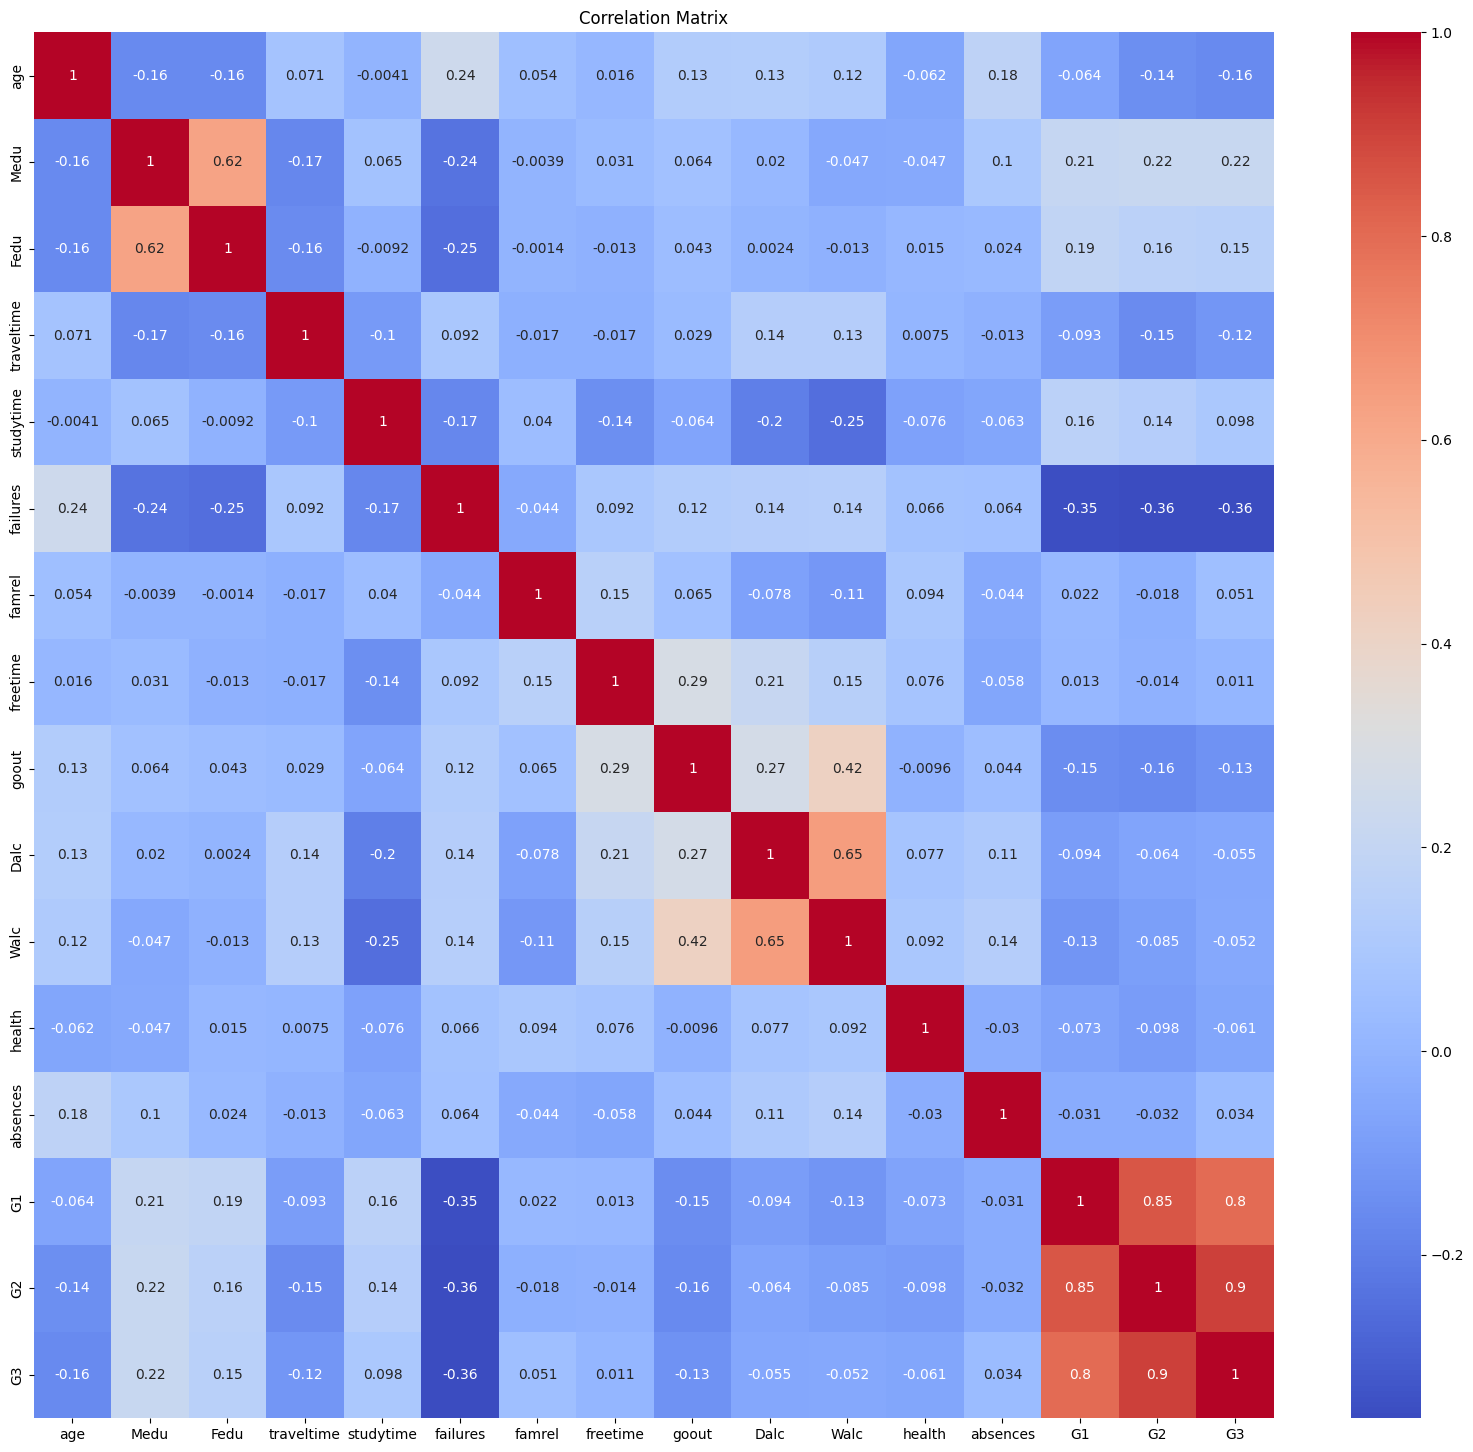

In [25]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.select_dtypes(exclude=['object', 'category']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
correlation_matrix = data.select_dtypes(exclude=['object', 'category']).corr()
print(correlation_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

In [27]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
encoded_data = pd.get_dummies(data, columns=categorical_columns, dtype=int, drop_first=True)

In [28]:
encoded_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [29]:
encoded_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [30]:
data = encoded_data

In [31]:
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['G3'], axis=1), data['G3'], test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [34]:
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [36]:
X_train_tensor = torch.tensor(X_train_transformed, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).to(device)

In [37]:
from torch.utils.data import DataLoader, TensorDataset

In [38]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=X_test_tensor.size()[0], shuffle=False)
next(iter(train_loader))

[tensor([[-0.5864, -0.6806, -1.4342,  ...,  0.2458, -2.2795,  1.3781],
         [-0.5864,  0.2464,  0.4232,  ...,  0.2458,  0.4387, -0.7257],
         [-1.3749,  1.1735,  1.3519,  ...,  0.2458,  0.4387, -0.7257],
         ...,
         [ 0.2021,  1.1735,  1.3519,  ...,  0.2458,  0.4387, -0.7257],
         [ 1.7792,  1.1735,  1.3519,  ...,  0.2458,  0.4387, -0.7257],
         [ 0.2021, -0.6806, -0.5055,  ...,  0.2458,  0.4387, -0.7257]]),
 tensor([14., 18.,  7., 11.,  8., 11.,  0.,  0.,  0., 10.,  0.,  9., 10.,  9.,
         12., 12., 13., 10., 13., 15.,  9., 14.,  9.,  0., 12., 11., 15., 13.,
          7.,  0., 15.,  6., 12.,  5.,  9.,  8., 12., 10.,  0.,  7., 15., 10.,
         13.,  0., 10., 15., 15., 11.,  0., 16.,  8., 11., 13., 11., 10.,  8.,
          5., 10., 11., 10.,  9., 18.,  0., 10.])]

In [39]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)

In [40]:
from sklearn.metrics import r2_score
def training(model, loss_module, optimizer, train_dl,test_loader, num_epochs, device, scheduler=None):
    train_losses = []
    test_losses = []
    train_r2s = []
    test_r2s = []
    outputs = None
    pbar = tqdm(range(num_epochs))
    for _ in pbar:
        model.train()
        avgLoss = 0
        for x, y in train_dl:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_module(outputs, y.view(-1, 1))
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            model.eval()
            train_outputs = model(X_train_tensor)
            train_loss = loss_module(train_outputs, y_train_tensor.view(-1, 1))
            train_losses.append(train_loss.item())
            train_r2 = (r2_score(y_train_tensor.view(-1, 1), train_outputs))
            train_r2s.append(train_r2.item())
            test_outputs = model(X_test_tensor)
            test_loss = loss_module(test_outputs, y_test_tensor.view(-1, 1))
            test_losses.append(test_loss.item())
            test_r2 = (r2_score(y_test_tensor.view(-1, 1), test_outputs))
            test_r2s.append(test_r2.item())
        pbar.set_description(f"Loss is : [{train_loss}]")
    return model, train_losses, train_r2s, test_losses, test_r2s

In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [42]:
model = MLP(X_train.shape[1], 256, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [43]:
# 1 SGD
lr = 0.01
num_epochs = 200
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/200 [00:00<?, ?it/s]

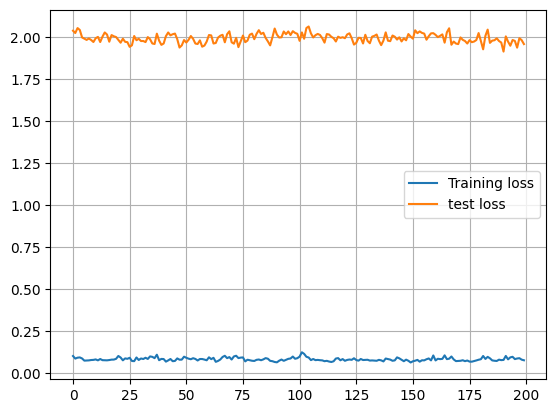

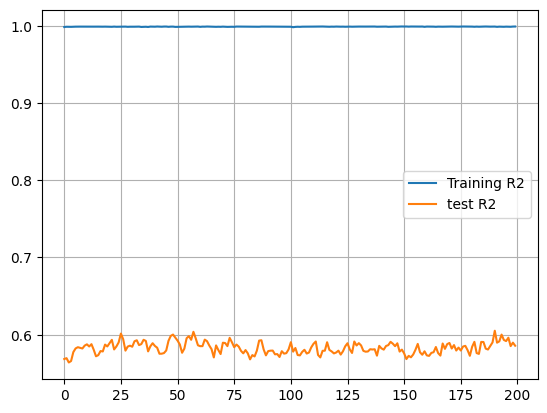

In [101]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.ELU(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.ELU(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)

In [46]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [47]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

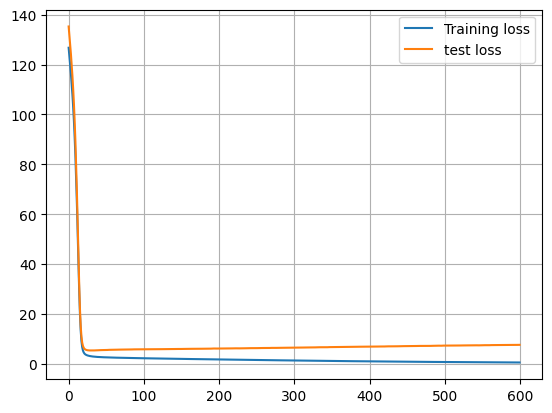

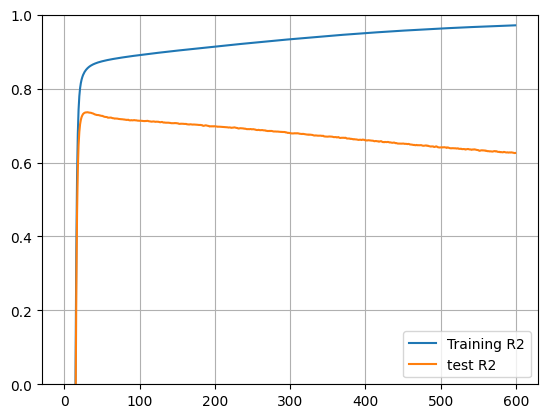

In [48]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.legend()
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [49]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.Softplus(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.Softplus(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)

In [50]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Softplus(beta=1.0, threshold=20.0)
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Softplus(beta=1.0, threshold=20.0)
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [51]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

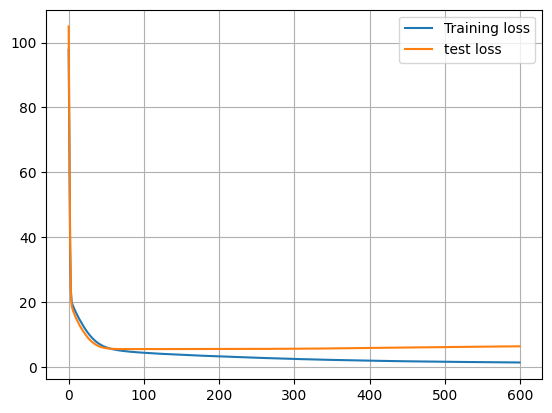

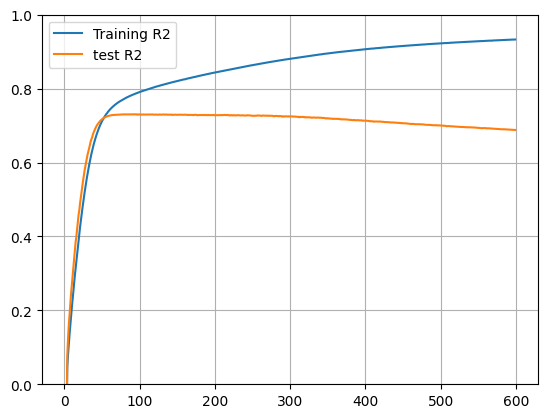

In [52]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [53]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.LeakyReLU(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.LeakyReLU(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)

In [54]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [55]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

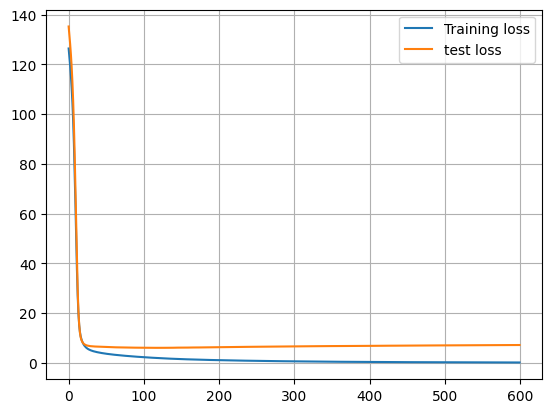

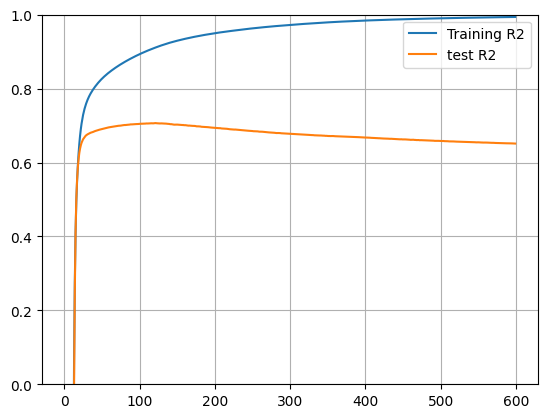

In [56]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [57]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.Tanh(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.Tanh(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)

In [58]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [59]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

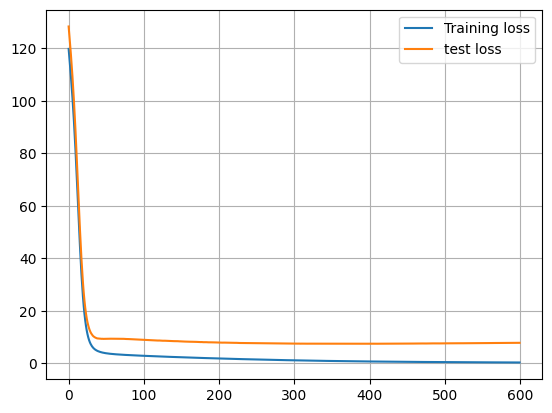

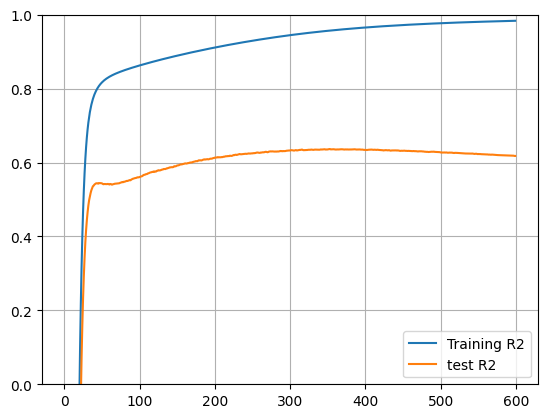

In [60]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [61]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [62]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

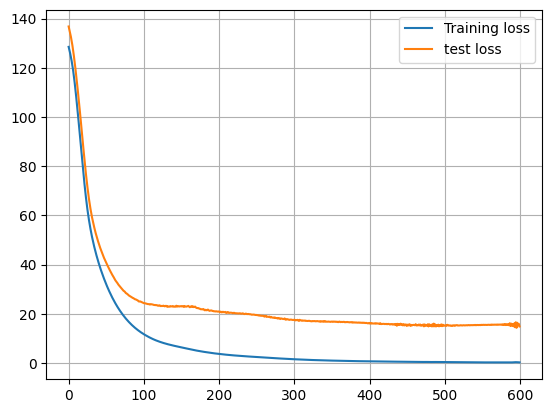

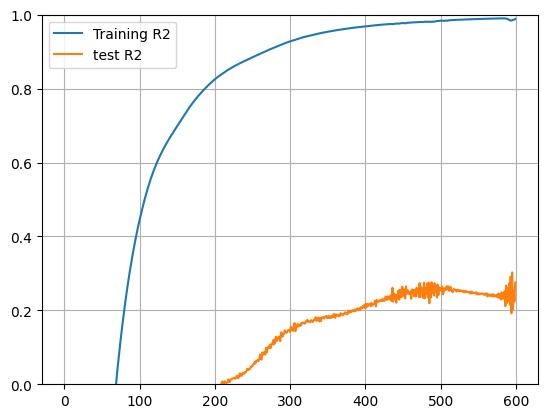

In [63]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [64]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [65]:
# 3 Adadelta
lr = 0.01
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

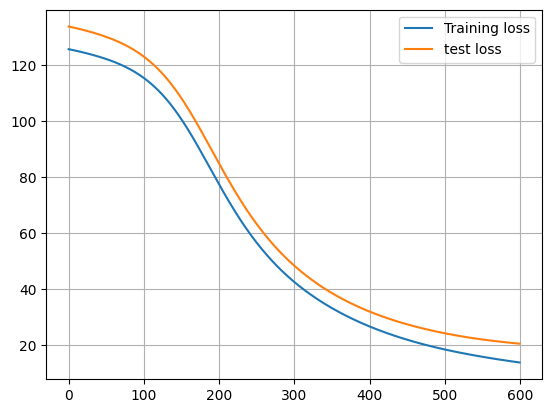

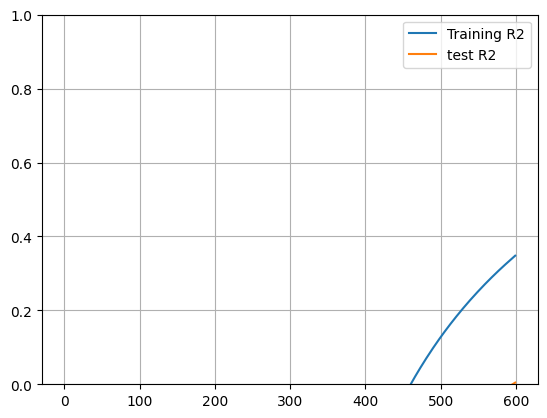

In [66]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [67]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [68]:
# 4 ASGD
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

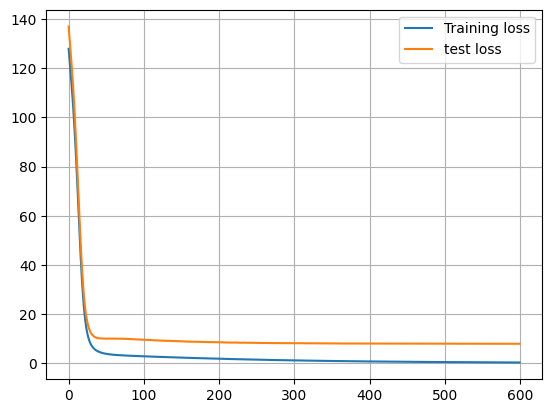

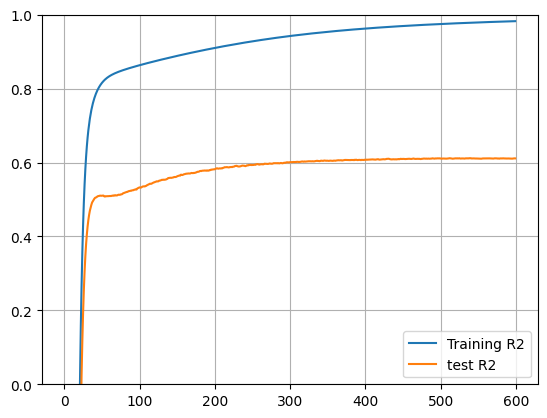

In [69]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [70]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [71]:
# 4 RMSprop
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

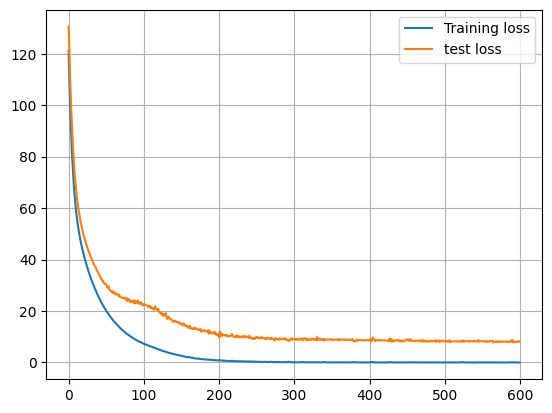

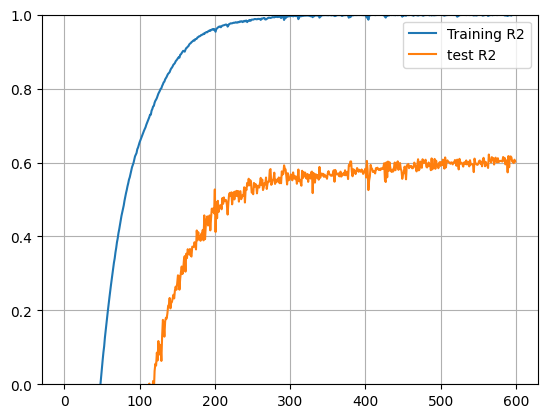

In [72]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [73]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [74]:
# 4 Rprop
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Rprop(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

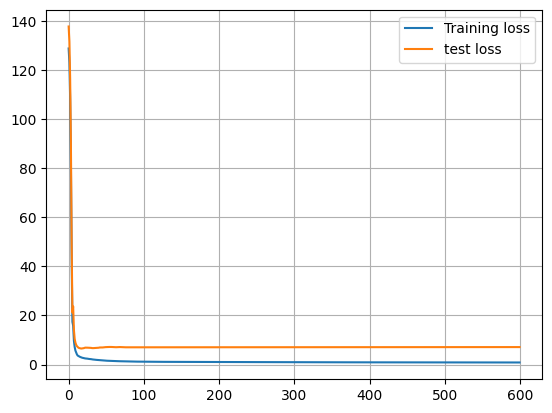

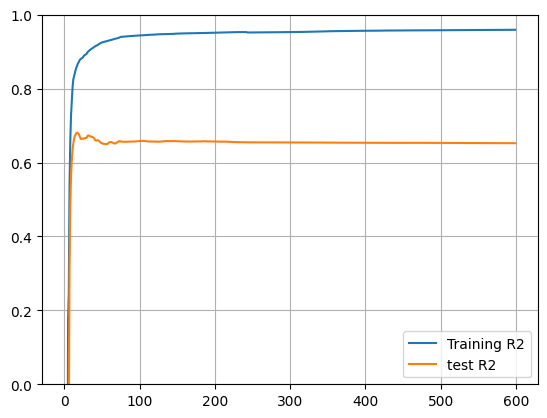

In [75]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [76]:
model = MLP(X_train.shape[1], 32, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [78]:
# 1 SGD
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

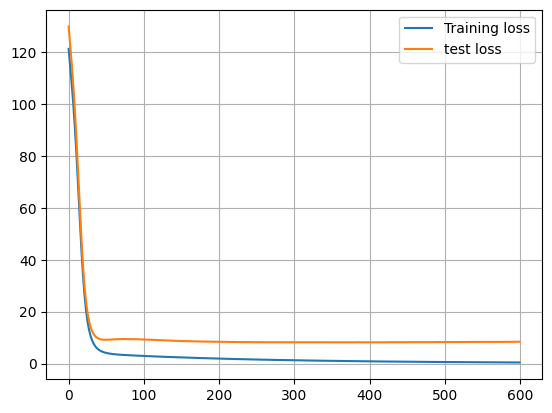

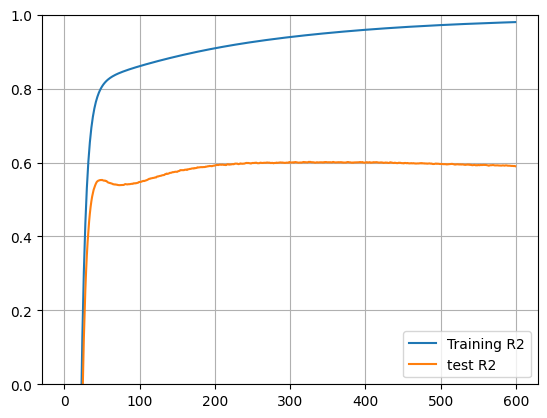

In [79]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [80]:
model = MLP(X_train.shape[1], 128, 32)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [81]:
# 1 SGD
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

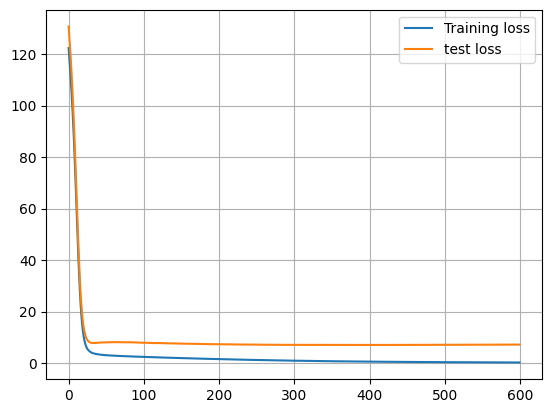

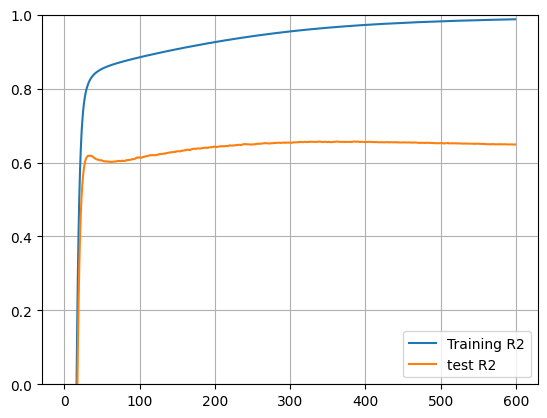

In [82]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [83]:
model = MLP(X_train.shape[1], 128, 32)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [84]:
# 1 SGD
lr = 0.005
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

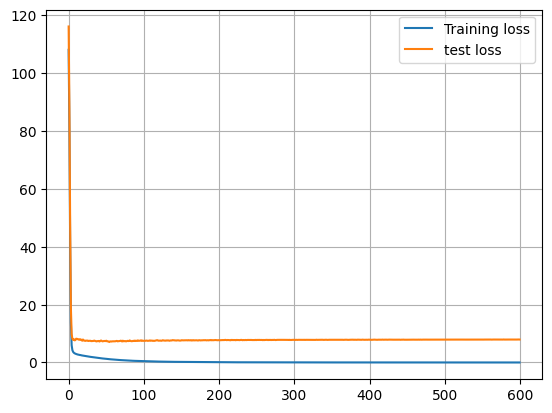

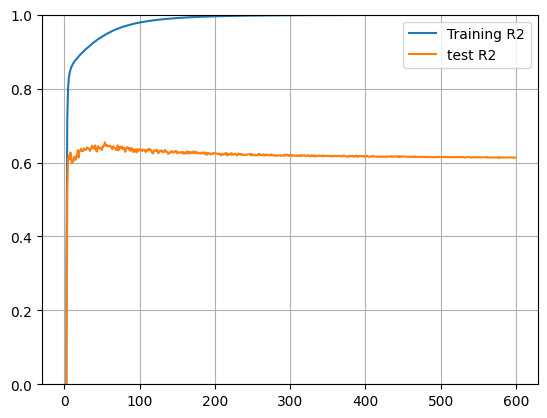

In [85]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [86]:
model = MLP(X_train.shape[1], 128, 32)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [87]:
# 1 SGD
lr = 0.0001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [88]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [89]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.001)  # Add weight decay to the optimizer

  0%|          | 0/600 [00:00<?, ?it/s]

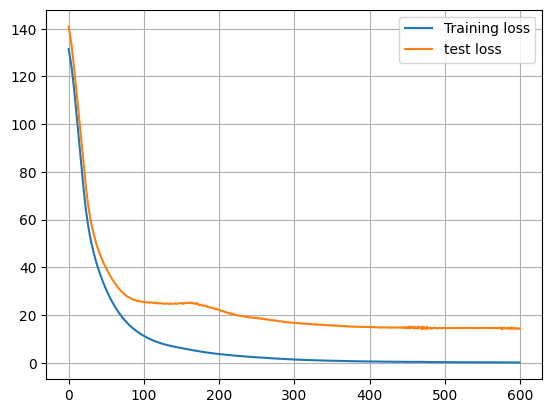

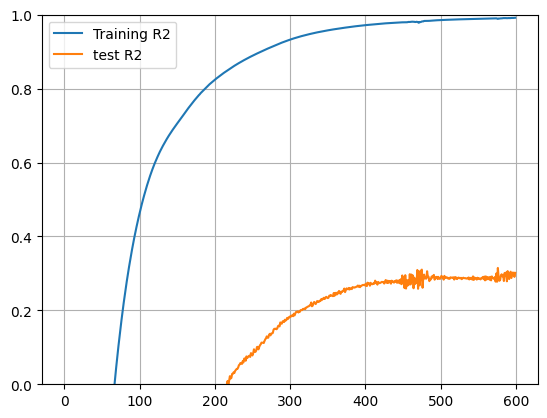

In [90]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [91]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [92]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

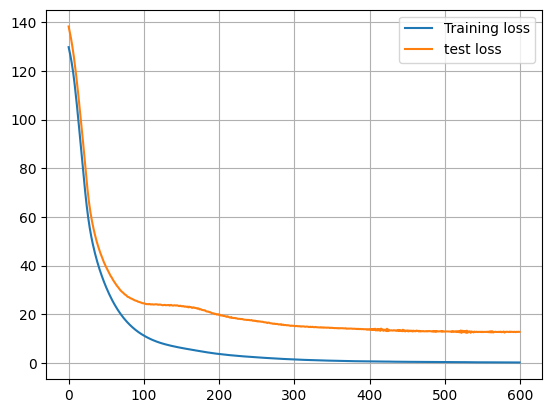

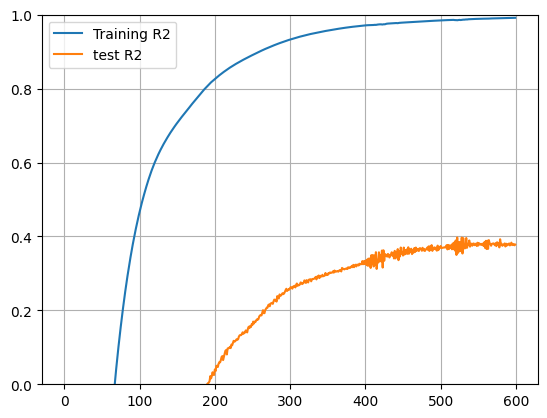

In [93]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [94]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [95]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)